In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
#Veri setinin hikayesi nedir?

In [4]:
df = planets.copy()

In [5]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [7]:
#Veri setinin yapısal bilgileri

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [9]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [10]:
df.method = pd.Categorical(df.method)

In [11]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [12]:
df.shape

(1035, 6)

In [13]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [15]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


In [16]:
#Eksik gözlem var mı kontrol edeceğiz.
df.isnull().values.any()

True

In [17]:
#Eksik değer var
#Hangi değişkende kaçar tane var?

In [18]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [19]:
#Değişkenlerin içindeki eksik değerleri 0 ile değiştirerek 
#işlemlerde kolaylık sağlamak için bu kodu kullanıyoruz.
#df["degisken_ismi"].fillna(0, inplace = True)

In [20]:
#Mass değişkeni içerisinde yer alan eksik değerleri ortalamaları ile değiştirmek
#için bu kodu kullanıyoruz.
#df["mass"].fillna(df.mass.mean(), inplace = True)

In [21]:
#Değişkenlerin içindeki bütün eksik verileri ortalama değerler ile değiştirmek için alttaki kodu kullanıyoruz.
#df.fillna(df.mean(), inplace = True)

Katogorik Değişken Özetleri

In [22]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [23]:
#Sadece Kategorik Değişkenler ve Özetleri

In [24]:
kat_df = df.select_dtypes(include = ["category"])

In [25]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [26]:
#Kategorik Değişkenlerin Sınıflarına ve Sınıf Sayısına Erişmek

In [27]:
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', ..., 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']

In [28]:
kat_df["method"].value_counts().count()

10

In [29]:
#Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [30]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

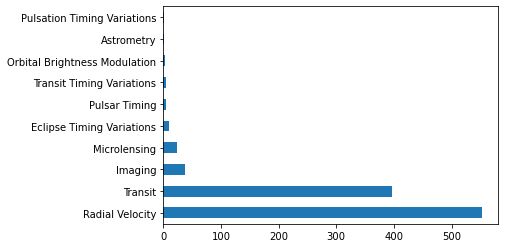

In [31]:
df["method"].value_counts().plot.barh();

In [32]:
#Sürekli Değişken Özetleri
df_num = df.select_dtypes(include = ["float64", "int64"])

In [33]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [34]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [35]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [36]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count()))
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].mean()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 264.06928217821786
Standart Sapma: 733.1164929404422


In [37]:
#Dağılım Grafikleri

#Barplot

In [38]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [41]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [42]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [43]:
#Ordinal Tanımlama

In [44]:
from pandas.api.types import CategoricalDtype

In [45]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [46]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [47]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [48]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [49]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [50]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [51]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

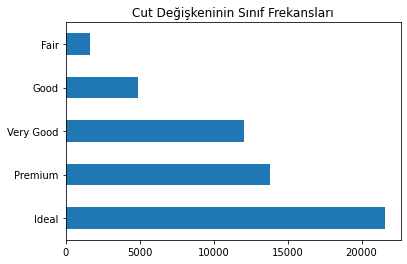

In [52]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

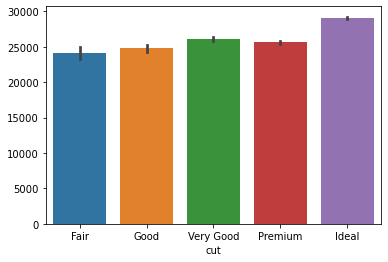

In [53]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

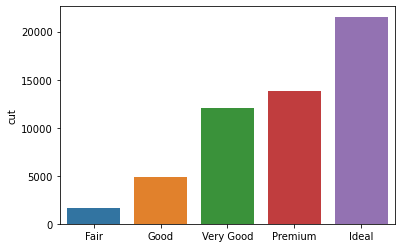

In [54]:
sns.barplot(x=df.cut.value_counts().index, y=df.cut.value_counts(), data = df);

In [55]:
#Çaprazlamalar

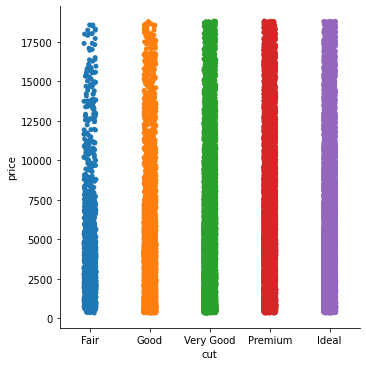

In [56]:
sns.catplot(x = "cut", y = "price", data = df);

In [57]:
#Kalite arttıkça price sürekli değişkenini daha yoğunlaşmaktadır.

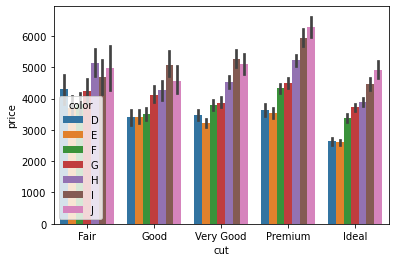

In [58]:
sns.barplot(x = "cut", y= "price", hue = "color", data = df);

In [59]:
#Katagorik değişkenlerimizi çaprazlarken color boyut değişkenini baz alarak yeniden çaprazladık. 
#Yeni kırılımlar ekledikçe diğer bilgilere erişebiliyoruz.

In [60]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [61]:
#Histogram ve Yoğunluk Grafiğinin Oluşturulması

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


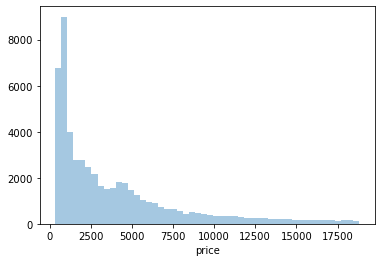

In [62]:
sns.distplot(df.price, kde = False);

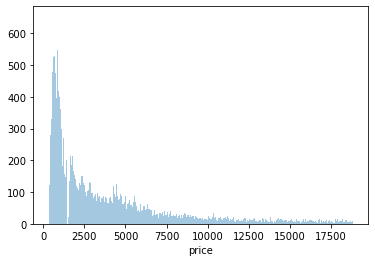

In [63]:
sns.distplot(df.price, bins = 1000, kde = False);

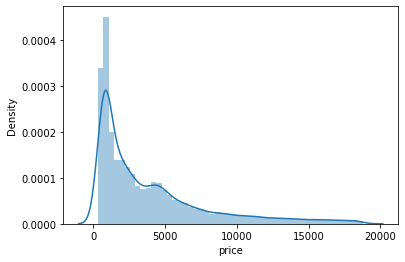

In [64]:
sns.distplot(df.price);

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


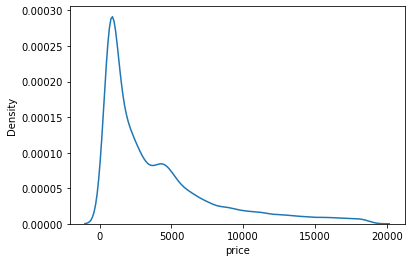

In [65]:
sns.distplot(df.price, hist = False);

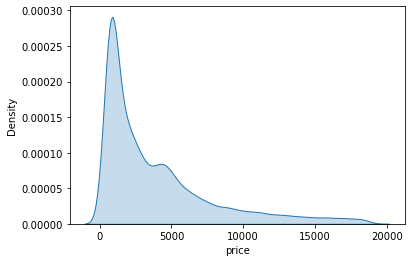

In [66]:
sns.kdeplot(df.price, shade = True);

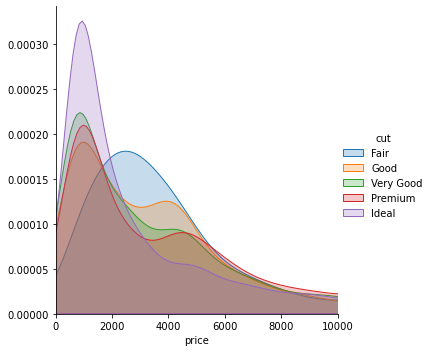

In [67]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

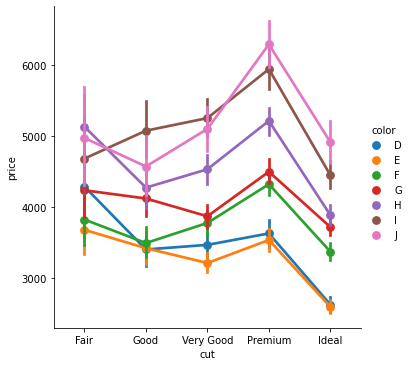

In [68]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

In [69]:
#Price değişkeninin içindeki diğer ayırt edici değişkenleri açıklamaya çalışıyoruz.
#Color, cut gibi değişkenler price değişkenine etki ediyor.

Boxplot

Veri Seti Hikayesi

total_bill: Yemeğin toplam fiyatı (bahşiş ve vergi dahil)
tip: Bahşiş
sex: Ücreti ödeyen kişinin cinsiyeti (0 = male, 1 = female)
smoker: Grupta sigara içen var mı? (0 = No, 1 = Yes)
day: Gün (3 = Thur, 4 = Fri, 5 = Sat, 6 = Sun)
time: Ne zaman? (0 = Day, 1 = Night)
size: Grupta kaç kişi var?

In [70]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [73]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [75]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [76]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [77]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

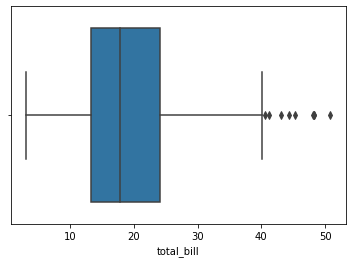

In [78]:
sns.boxplot(x = df["total_bill"]);

In [80]:
#En baştaki değer minimum değeri ifade ediyor. Mavi kutunun ortasındaki değer mean değeri verir. 
#Mavi kutunun dışında sol taraftaki çizgi ise maximum değerdir. 
#Çizginin dışındaki nokta değerler ise aykırı değerlerdir.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


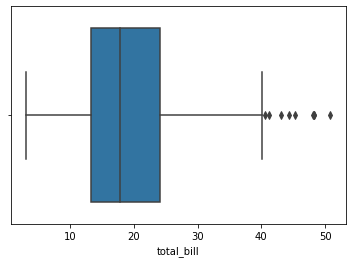

In [82]:
sns.boxplot(x = df["total_bill"], orient = "v");

In [83]:
#Çaprazlamalar

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [85]:
#Hangi günler daha fazla kazanıyoruz?

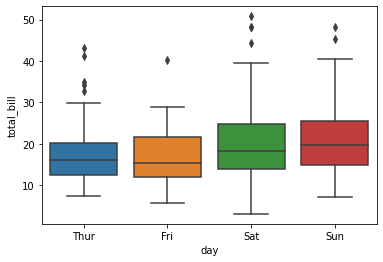

In [86]:
sns.boxplot(x = "day", y = "total_bill", data = df);

In [87]:
#Cumartesi günü daha fazla müşteri olduğu halde daha az para bırakmış pazar gününe göre. 
#Pazar günü gelen müşterilerin daha fazla para bıraktığı görülüyor daha az müşteri olmasına rağmen.

In [88]:
#Sabah mı alşam mı daha çok kazanıyoruz?

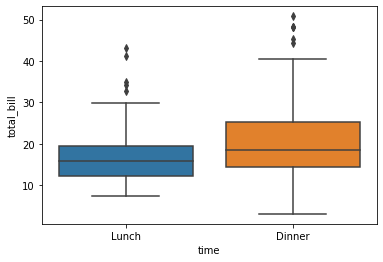

In [89]:
sns.boxplot(x = "time", y = "total_bill", data = df);

In [90]:
#En çok para kazandığımız saatler akşam saatleri. Bu sebeple akşamları en iyi personelimi çalıştırabilirim.

In [91]:
#Yemeğe gelen grupların içerisindeki kişi sayısıyla kazancın doğru orantısını karşılaştırılması.

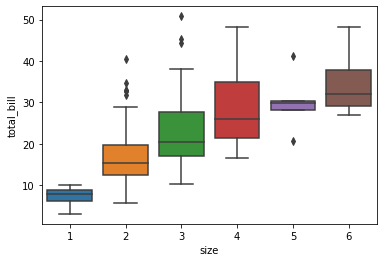

In [92]:
sns.boxplot(x = "size", y = "total_bill", data = df);

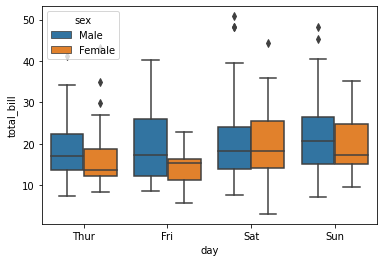

In [93]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

# Violin Grafiği

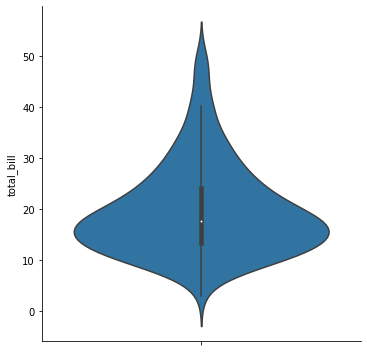

In [94]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

In [95]:
#Çaprazlamalar

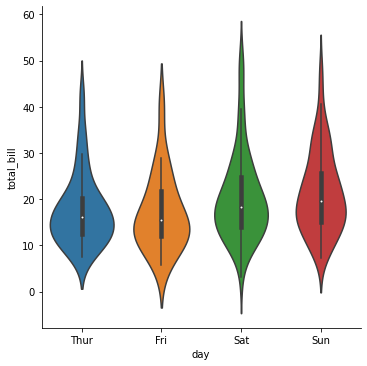

In [96]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

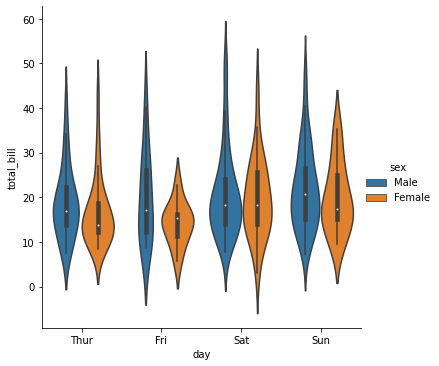

In [97]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", hue = "sex", data = df);

# Korelasyon Grafiği

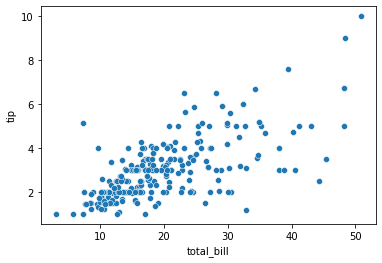

In [99]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

In [100]:
#Çaprazlamalar

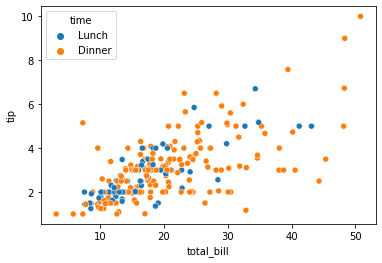

In [101]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

In [102]:
#Akşam yemeklerinde ödenen miktar arttıkça bahşişin arttığını gözlemledik.
#Öğlen yemeklerinde bahşişler akşam yemeklerine göre daha az bahşiş ödenmiş.

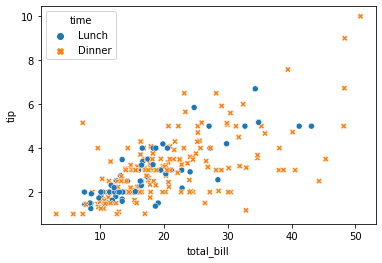

In [103]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

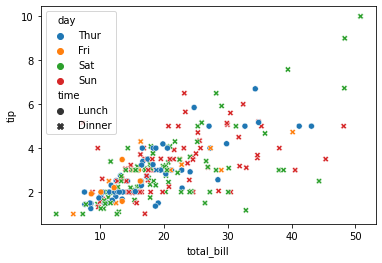

In [104]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

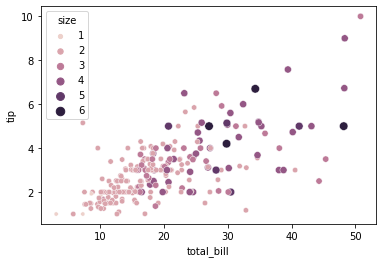

In [106]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", hue = "size", data = df);

In [107]:
#Doğrusal İlişkinin Gösterilmesi

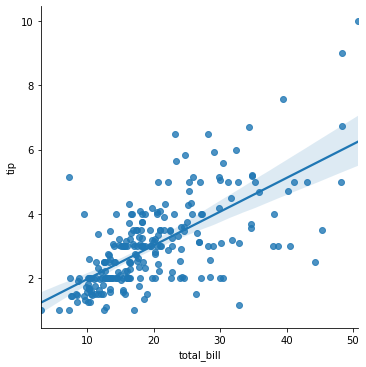

In [108]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

In [109]:
#İki değişken arasında doğrusal ilişki gösteriliyor.
#Doğrunun entrafındaki açık mavi renkli gölgeler standart sapmayı göstermektedir.

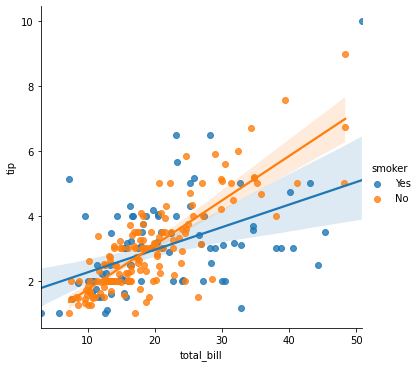

In [110]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

In [111]:
#Sigara içmeyenler için toplam ödeme arttıkça bahşişde artmaktadır. 
#Sigara içenler için de toplam ödeme arttıkça bahşişde artmaktadır ama sigara içmeyenlere göre fazla değildir.

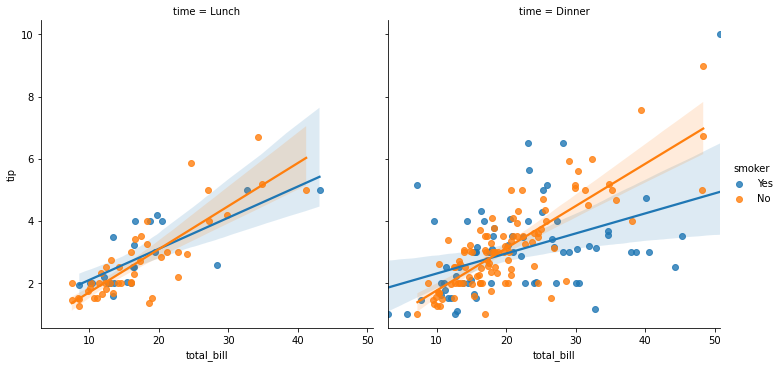

In [112]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

In [113]:
#Öğünlere göre değişkenler değişmektedir.

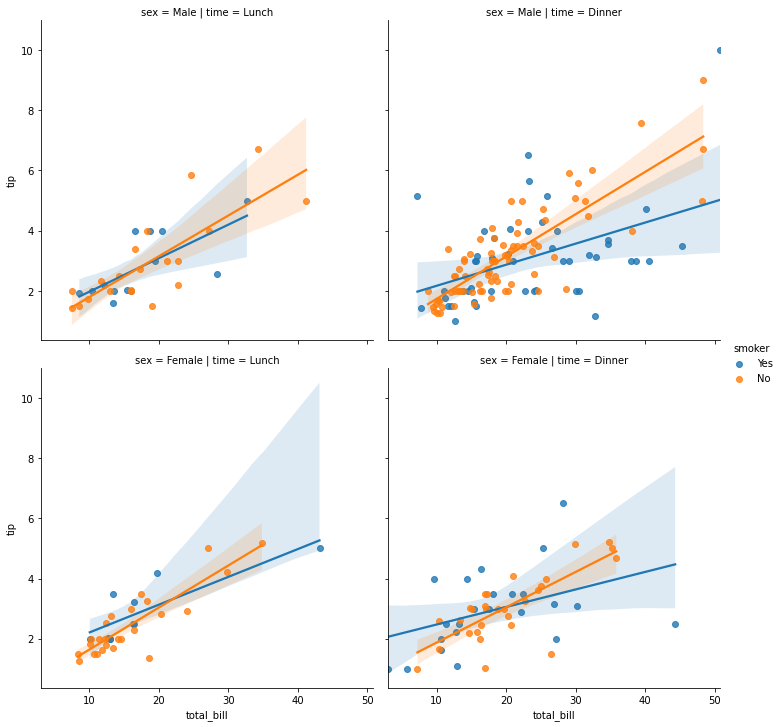

In [114]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

In [115]:
#Scatterplot Matrisi

In [116]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [118]:
df.shape

(150, 5)

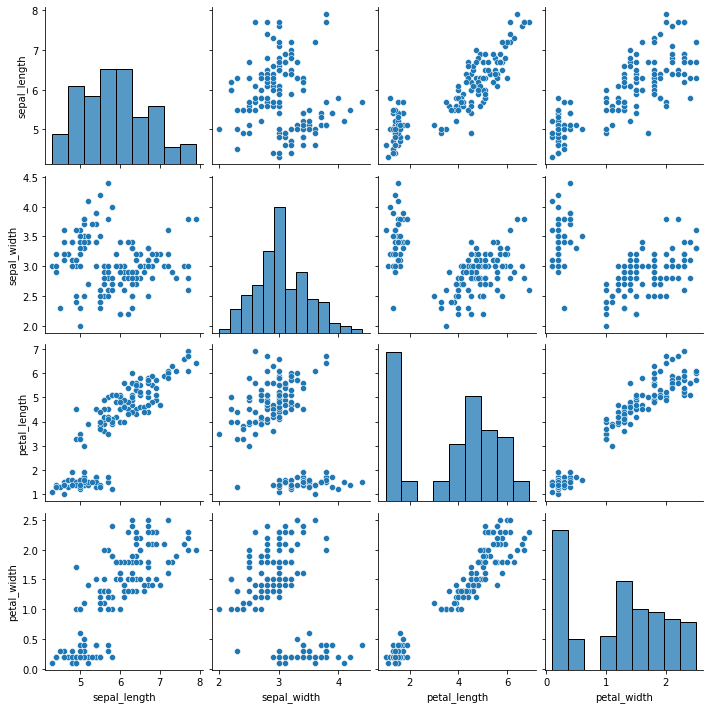

In [120]:
sns.pairplot(df);

In [121]:
#Eksenlerde yapılacak kesişimler ile değişkenlerin arasındaki ilişkinin sunulması.
#Eğer oluşturulmuş grafik toz bulutu şeklindeyse değişkenler arasında bir ilişki olmadığı anlamına gelir.
#Oluşturulan scatterplot içerisinde gözlem noktaları incelendiğinde bunlar birbirlerinden farklı köşelerde kümeleniyorsa, bazı alt gruplar vardır. 
#Bunların incelenmesi gerekmektedir.

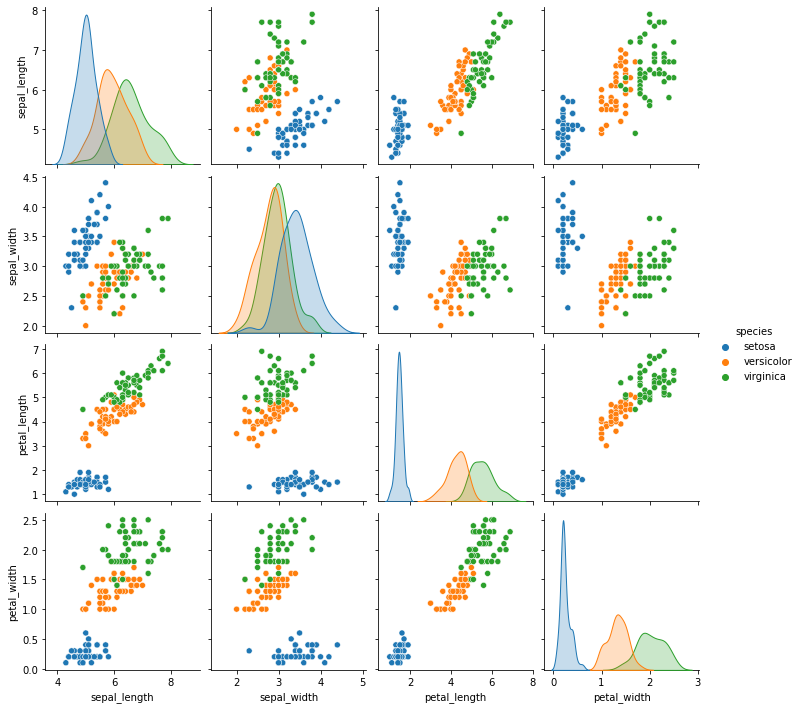

In [122]:
sns.pairplot(df, hue = "species");

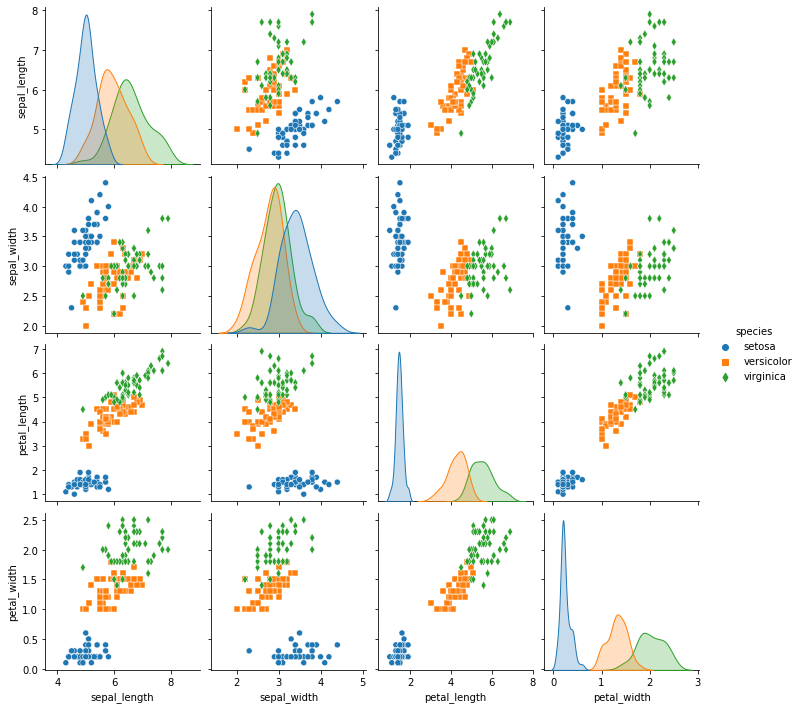

In [123]:
sns.pairplot(df, hue = "species", markers = ["o", "s", "d"]);

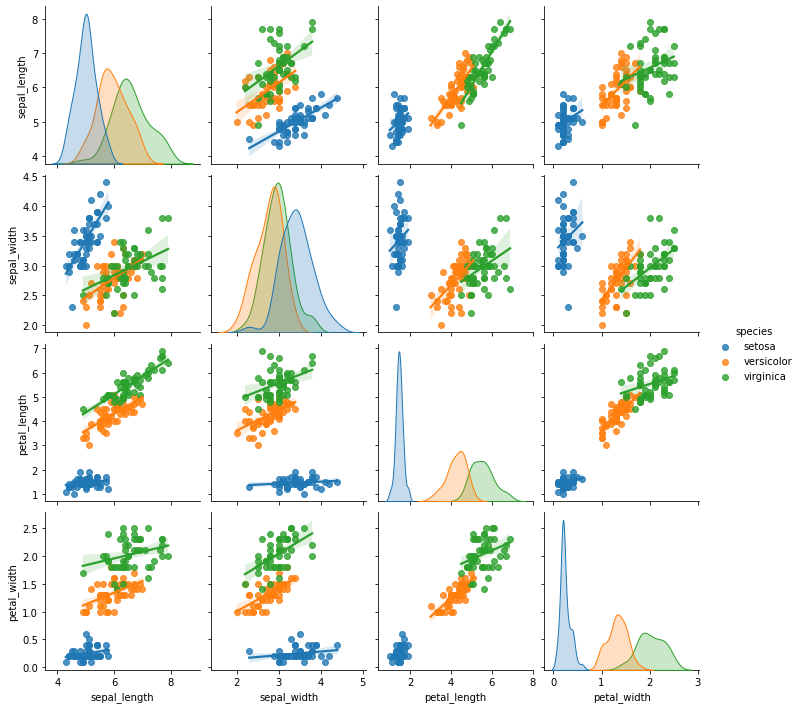

In [126]:
sns.pairplot(df,  hue = "species", kind = "reg");

In [127]:
#ISI HARİTASI

In [128]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [129]:
df.shape

(144, 3)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [133]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [134]:
df = df.pivot("month", "year", "passengers");

In [135]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


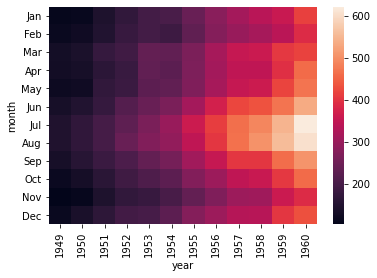

In [136]:
sns.heatmap(df);

In [137]:
#En açık renkler orta tarafta gözleniyor. Yıllar arttıkça renkler açılıyor. 
#Bunun anlamı yaz aylarında daha fazla seyahat yapılmış. 

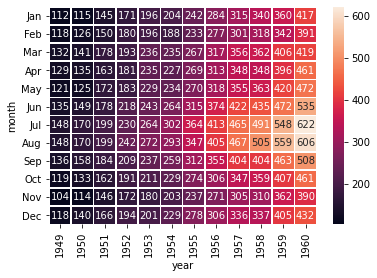

In [138]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

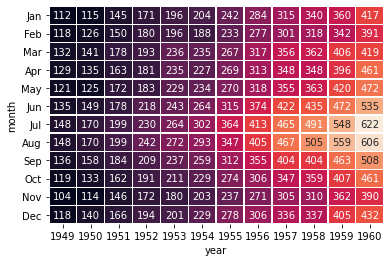

In [139]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

In [140]:
#ÇİZGİ GRAFİĞİ

In [141]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [142]:
df.shape

(1064, 5)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [145]:
#Her bir zaman noktasına göre sinyali inceleyelim. 

In [146]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [147]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [148]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [149]:
#Her bir zaman noktasında eşit sinyal sayılmış.

In [150]:
df.groupby("signal")["timepoint"].count()

signal
-0.255486    1
-0.238474    1
-0.224351    1
-0.181241    1
-0.178510    1
            ..
 0.455575    1
 0.460896    1
 0.476055    1
 0.494787    1
 0.564985    1
Name: timepoint, Length: 1064, dtype: int64

In [151]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [152]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


In [153]:
#Lineplot oluşturulması

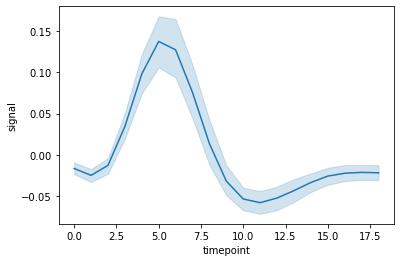

In [155]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

In [156]:
#Açık renkli mavi gölgeler standart sapmalarla oluşturulmuş güven aralıklarıdır.
#Bazı noktalarda sinyaller artmış bazı noktalarda sinyaller daralmıştır.

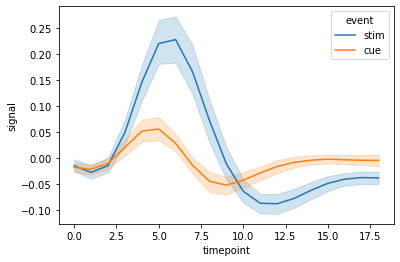

In [157]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

In [158]:
#Bir katagorik değişken eklenerek daha açıklanabilir hale geliyor.

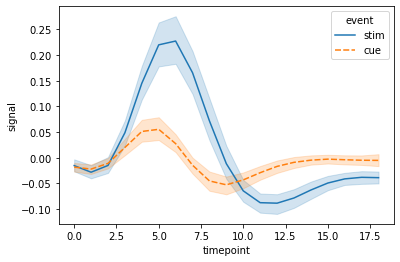

In [159]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

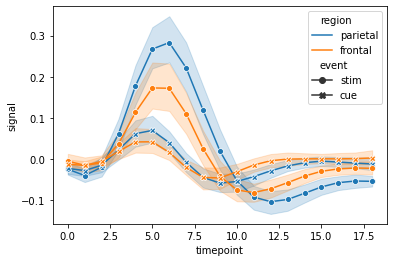

In [160]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             markers = True, 
             dashes = False, 
             data = df);

In [161]:
!pip install pandas_datareader
import pandas_datareader as pr

In [162]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2021-11-12")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251436
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643715
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181013
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202669
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.320066


In [163]:
df.shape

(1478, 6)

In [164]:
kapanis = df["Close"]

In [165]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

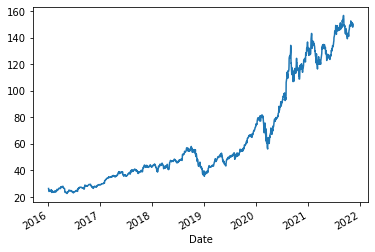

In [166]:
kapanis.plot();

In [167]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12'],
              dtype='datetime64[ns]', name='Date', length=1478, freq=None)

In [168]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [169]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

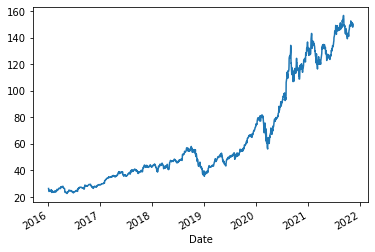

In [170]:
kapanis.plot();

In [171]:
#Elimizde kategorik değişkenler varsa sütun grafiği uygularız. 

#Elimizde sayısal değişkenler varsa boxplot ve histogram kullanabiliriz. Ayrıca violin'de kullanabiliriz.

#İki sayısal değişken arasında korelasyon ilişkisi vardır.

In [172]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [174]:
df.isnull().sum().any()

False